# ESC Practical 1 - Signal Identification

## [On-Off Keying (ASK)](#ASK)
## [4-Amplitude-Shift Keying (ASK)](#4ask)
## [Differential Binary Phase-Shift Keying (DBPSK)](#dbpsk)
## [Differential Quadrature Phase-Shift Keying (DQPSK)](#dqpsk)
## [Differential 8 Phase-Shift Keying (D8PSK)](#d8psk)

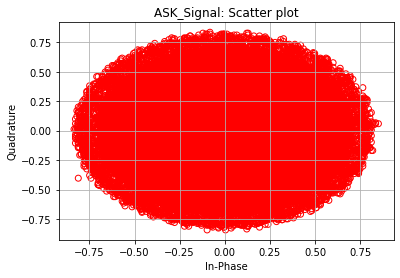

In [319]:
import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt

file = open("data.bin", "r")
interleaved_data = np.fromfile(file, np.uint8)
file.close()

I_data_raw = interleaved_data[0:len(interleaved_data):2] 
Q_data_raw = interleaved_data[1:len(interleaved_data):2]

I_samples = (I_data_raw-127.5)/127.5
Q_samples = (Q_data_raw-127.5)/127.5
complex_data = I_samples + 1j*Q_samples

%matplotlib inline

# Plot the in-phase data.
plt.figure(1)

plt.scatter(np.real(complex_data), np.imag(complex_data),facecolors='none', edgecolors='r') 
plt.xlabel("In-Phase") 
plt.ylabel("Quadrature")
plt.title("ASK_Signal: Scatter plot")
plt.grid()
plt.show()


# plt.plot(I_samples)
# plt.xlabel("Time Bins")
# plt.ylabel("Normalized Amplitude")
# plt.xlim(0,len(I_samples))
# plt.title("In-Phase Data (5 Bursts: OOK, 4-ASK, DBPSK, DQPSK, D8PSK)")
# plt.grid()
# plt.show()

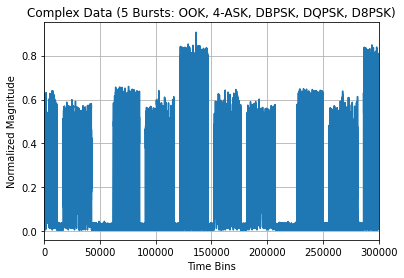

In [320]:
plt.figure(2)
plt.plot(np.abs(complex_data))
plt.xlabel("Time Bins")
plt.ylabel("Normalized Magnitude")
plt.xlim(0,len(complex_data))
plt.title("Complex Data (5 Bursts: OOK, 4-ASK, DBPSK, DQPSK, D8PSK)")
plt.grid()
plt.show()

## Known variables

In [321]:
fs = 2.4E6 #Carrier frequency of SDR
tau = 1/(fs) #Timestep between sample

## <a id='ASK'>ASK</a>

In [322]:
ASK_start = 90764
ASK_end  =  ASK_start + 25509
ASK_N_fft = ASK_end - ASK_start

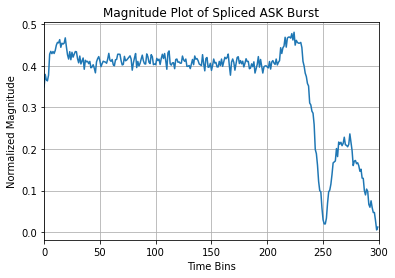

In [323]:
ASK_spliced_further = complex_data[ASK_start:ASK_end]

# Plot the magnitude of the spliced ASK burst.
plt.figure(3)
plt.plot(np.abs(ASK_spliced_further[0:300]))
plt.xlabel("Time Bins")
plt.ylabel("Normalized Magnitude")
plt.xlim(0,300)
plt.title("Magnitude Plot of Spliced ASK Burst")
plt.grid()
plt.show()

In [324]:
ϕ_ASK = 0


ASK_I = np.real(complex_data[ASK_start:ASK_end]) #np.cos(2*np.pi*Carrier_Freq*t1 + ϕ_ASK)
ASK_Q = np.imag(complex_data[ASK_start:ASK_end]) #np.sin(2*np.pi*Carrier_Freq*t1 + ϕ_ASK)

ASK_mag = np.abs(complex_data)[ASK_start:ASK_end]

Real_values = ASK_I / ASK_mag.max()
Imag_values = ASK_Q / ASK_mag.max()

ASK_Signal_Raw = Real_values + 1j*Imag_values

Frequency_Range = np.fft.fftfreq(len(ASK_Signal_Raw),tau)
steps = np.arange(0,len(ASK_Signal_Raw),1)
time = steps*tau



t1 = np.linspace(0, len(ASK_Signal_Raw)/fs, len(ASK_Signal_Raw))
f1 = np.arange(0, fs, fs/len(ASK_Signal_Raw))
f2 = np.arange(-fs/2, fs/2, fs/len(ASK_Signal_Raw)) #plotting from -fs/2 to fs/2

print(len(ASK_Signal_Raw))

25509


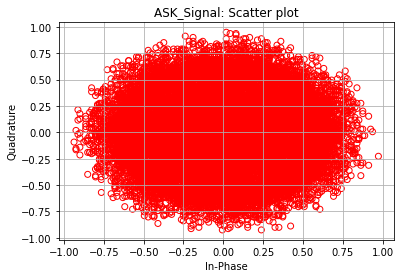

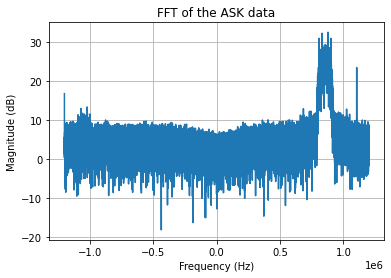

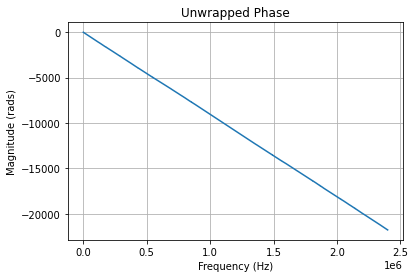

In [325]:
ASK_sig_phase = np.angle(ASK_Signal_Raw)
Unwrapped_ASK_Sig_phase = np.unwrap(ASK_sig_phase)

#Just plotting the FFT
ASK_Raw_Data_FFT = np.fft.fft(ASK_Signal_Raw)
ASK_Raw_Data_FFT_mag = 10*np.log10(np.abs(ASK_Raw_Data_FFT))

#Above plot,but frequency shifted
# ASK_Data_FFT_shifted = np.fft.fftshift(ASK_Data_FFT)
# ASK_Data_FFT_shifted_mag = 10*np.log10(np.abs(ASK_Data_FFT_shifted))

plt.figure(4);

plt.scatter(np.real(ASK_Signal_Raw), np.imag(ASK_Signal_Raw),facecolors='none', edgecolors='r') 
plt.xlabel("In-Phase") 
plt.ylabel("Quadrature")
plt.title("ASK_Signal: Scatter plot")
plt.grid()
plt.show()

# plt.plot(steps,ASK_Data_FFT_mag)
# plt.xlabel("Frequency (Hz)")
# plt.ylabel("Magnitude (dB)")
# plt.title("FFT of the ASK data from -fs/2 to fs/2")
# plt.grid()
# #plt.xlim(-fs/2,fs/2)
# plt.show()

plt.figure(5)
plt.plot(f2,ASK_Raw_Data_FFT_mag)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.title("FFT of the ASK data")
plt.grid()
#plt.xlim(0,fs)
plt.show()

plt.figure(6)
plt.plot(f1,Unwrapped_ASK_Sig_phase)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (rads)")
plt.title("Unwrapped Phase")
plt.grid()
#plt.xlim(0,fs)
plt.show()

-343592.17409632


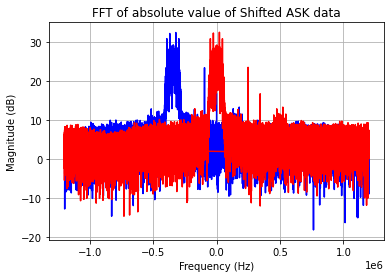

In [326]:
Carrier_Phase = np.angle(ASK_Signal_Raw[2:227])
Unwrapped_Phase = np.unwrap(Carrier_Phase)
Carrier_Phase_median = np.diff(Unwrapped_Phase)
#Shan here you were taking the |freq| this means that it should be negative but you were getting a positive
#Thus the negative frequerncy shift was a positive freqenecy shift.
Carrier_Freq = np.median(Carrier_Phase_median)  / (np.pi*2*tau)

print(Carrier_Freq) #Note the negative frequency shift

ASK_Signal_Final = ASK_Signal_Raw*(np.cos(2*np.pi*(-1*Carrier_Freq)*time) + 1j*np.sin(2*np.pi*(-1*Carrier_Freq)*time))

#FFT of abs of data
ASK_Sig_FFT = np.fft.fft(ASK_Signal_Raw) 
ASK_FFT_mag = 10*np.log10(np.abs(ASK_Sig_FFT)) 

#FFT of abs of final corrected signal data
Signal_FFT = np.fft.fft(ASK_Signal_Final)
Signal_FFT_mag = 10*np.log10(np.abs(Signal_FFT))


#FFT of Shifted data

#Shan here you are using the wrong freqency to plot that f1,f2 you use mess with your results
plt.figure(7)
plt.plot(Frequency_Range,ASK_FFT_mag,'b')
plt.plot(Frequency_Range,Signal_FFT_mag,'r')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.title("FFT of absolute value of Shifted ASK data")
plt.grid()
plt.show()

I am not sure what this plot shows you

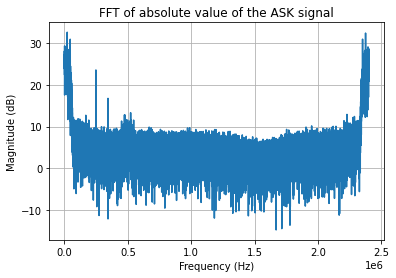

In [327]:
#Plot using frequency bins (index)
plt.figure(8)
plt.plot(f1,Signal_FFT_mag)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.title("FFT of absolute value of the ASK signal")
# plt.xlim(0,ASK_N_fft)
plt.grid()
plt.show()

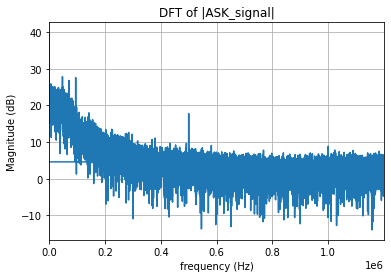

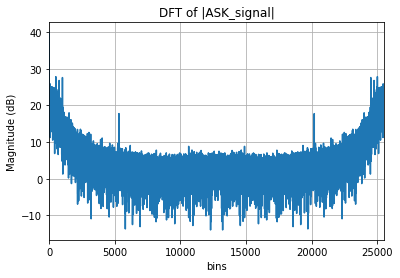

In [328]:
#DFT of |ASK_signal|
ASK_SIGNAL_ABS = np.fft.fft(np.abs(ASK_Signal_Final))
ASK_MAG_ABS = 10*np.log10(np.abs(ASK_SIGNAL_ABS))
ASK_SIGNAL_Φ = np.unwrap(np.angle(ASK_SIGNAL_ABS))

f1, ax = plt.subplots(1,1)
ax.plot(Frequency_Range,ASK_MAG_ABS)
plt.xlabel("frequency (Hz)") 
plt.ylabel("Magnitude (dB)")
plt.title("DFT of |ASK_signal|")
plt.xlim(-1,Frequency_Range.max())
plt.grid()
plt.show()

f2, ax = plt.subplots(1,1)
ax.plot(steps,ASK_MAG_ABS)
plt.xlabel("bins") 
plt.ylabel("Magnitude (dB)")
plt.title("DFT of |ASK_signal|")
plt.xlim(0,steps.max())
plt.grid()
plt.show()

In [329]:
Signal_FFT_Phase=np.angle(Signal_FFT)
Index_max = 800+(ASK_MAG_ABS[800:1200].argmax())
f_clk=Frequency_Range[Index_max]
freq_δ = np.abs(Frequency_Range[0]-Frequency_Range[1])/2
#Now need to obtain the phase of the clock.
# I did this by using the index function which searches the array and returns the bin where that value is located
for i, j in enumerate(Frequency_Range):
    if (f_clk-freq_δ) < j < (f_clk+freq_δ):
            freq_bin=(i)
f_clk = Frequency_Range[freq_bin]
Φ = ASK_SIGNAL_Φ[freq_bin]


print('Clock Frequency:',f_clk,'Hz')
print('Φ:',Φ,'radians')
print('bin:',freq_bin)


#cosine clock

fc = f_clk#Frequency of clock    94920.03762935089
phi = Φ #phase of clock 
clock = np.cos((2*np.pi*fc*t1)+phi)

Clock Frequency: 94931.20075267553 Hz
Φ: 80.3625382466489 radians
bin: 1009


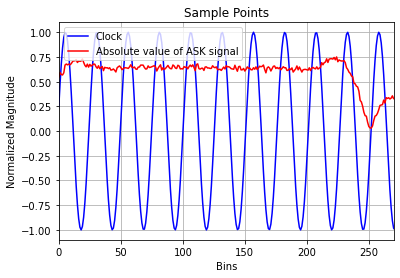

In [330]:
Abs_ASK_FFT =  np.fft.fft(np.abs(ASK_Signal_Final))


plt.figure(9)
plt.plot(clock,'b',label='Clock')
plt.plot(np.abs(ASK_Signal_Raw),'r',label='Absolute value of ASK signal')
plt.xlim(0,len(ASK_Signal_Raw))
plt.title("Sample Points")
plt.xlabel("Bins")
plt.ylabel("Normalized Magnitude")
plt.legend(loc='upper left')
plt.xlim(0,270)
# plt.ylim(0,0.6)
plt.grid()
plt.show()

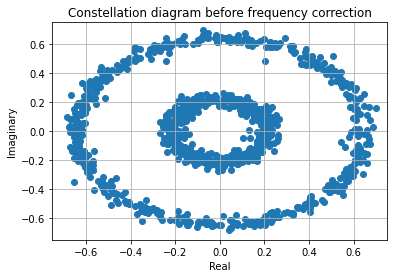

In [331]:
Samples = []
peaks = sp.find_peaks(clock)
for i in peaks[0]:
    Samples.append(ASK_Signal_Final[i])


    
Sample_value = []
Sample_number = []
counter = 0

# for i in range(len(ASK_Signal)):
#     counter = i
#     if clock[i] == 1:
#         Sample_value.append(np.real(ASK_Signal[counter])+1j*np.imag(ASK_Signal[counter]))
#         print(ASK_Signal[i])
#         print(counter)
       
# print(len(ASK_Signal))
# print(symbol)

 
Symbols = np.real(Samples) + 1j*np.imag(Samples)

plt.figure(10)
plt.scatter(np.real(Symbols), np.imag(Symbols))
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.title("Constellation diagram before frequency correction")
plt.xlim(-0.75, 0.75)
plt.ylim(-0.75, 0.75)
plt.grid()
plt.show()        
        

 Corse Frequency Offset: 45782.05 Hz


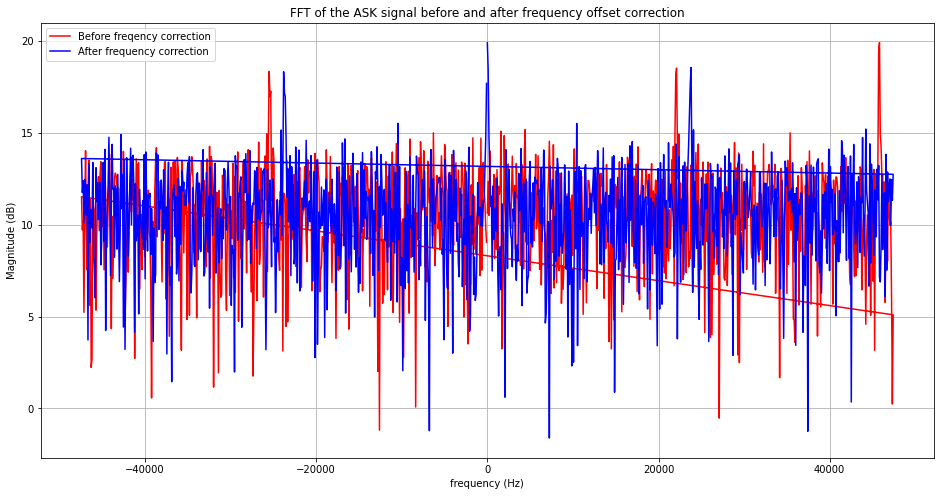

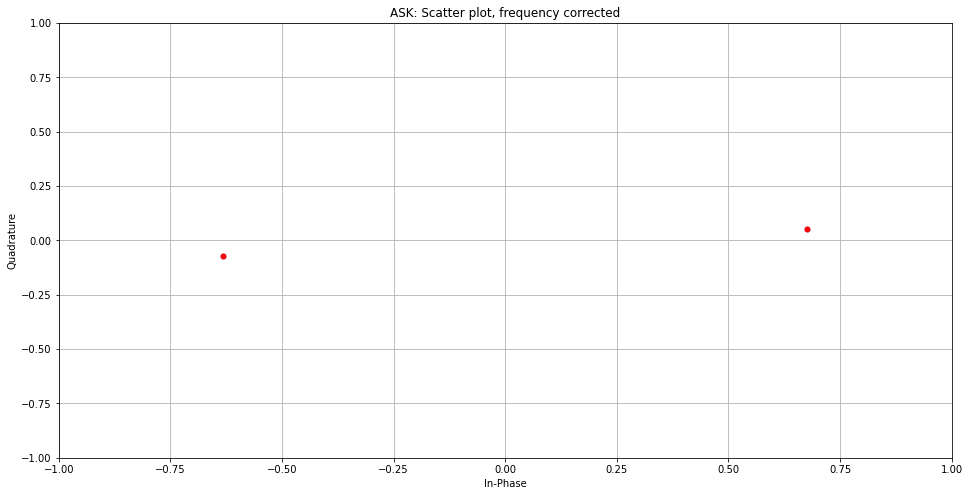

In [332]:

Symbols_FFT = np.fft.fft(Symbols)
Symbols_FFT_mag = 10*np.log10(np.abs(Symbols_FFT))

Ts = 1/(fc) #Timestep between samples
freq_range = np.fft.fftfreq(len(Symbols),Ts)
Points=np.arange(0,len(Symbols),1)
t=Points*Ts



Δ_f = 45782.05
symbol_data_off = Symbols*(np.cos(2*np.pi*(-1*Δ_f)*t) + 1j*np.sin(2*np.pi*(-1*Δ_f)*t))
symbol_data_off = symbol_data_off * np.e**(-1j*np.angle(Symbols[1]))
print(" Corse Frequency Offset:",Δ_f,'Hz')




### DFT after correction
ASK_Final = np.fft.fft(Symbols_Offset)
ASK_Final_mag = 10*np.log10(np.abs(ASK_Final))

#Plotting the results
plt.rcParams['figure.figsize'] = (16,8)
plt.figure(11)
plt.plot(freq_range,Symbols_FFT_mag,'r',label='Before freqency correction')
plt.plot(freq_range,ASK_Final_mag,'b',label='After frequency correction')
plt.xlabel("frequency (Hz)") 
plt.ylabel("Magnitude (dB)")
plt.title("FFT of the ASK signal before and after frequency offset correction")
plt.legend(loc='upper left')
plt.grid()
plt.show()

plt.figure(12)
plt.scatter(np.real(Symbols_Offset[:2]), np.imag(Symbols_Offset[:2]),linewidths=0.1,facecolors='r', edgecolors='b')
plt.xlabel("In-Phase") 
plt.ylabel("Quadrature")
plt.title("ASK: Scatter plot, frequency corrected")
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.grid()
plt.show()

In [333]:
real_symbol=np.real(Symbols_Offset)
#real_symbol=real_symbol[0:len(real_symbol):1]
data=[]
for i, j in enumerate(real_symbol):
    if  -1 < j < - 0.5:
        data.append('0')
        data.append('0')
    if -0.5 < j < 0:
        data.append('0')
        data.append('1')
    if 0 < j < 0.5:
        data.append('1')
        data.append('1')
    if 0.5 < j < 1:
        data.append('1')
        data.append('0')
data = ''.join(data)
message = ""
for i in  range(0,544,8):
    temp_data = data[i:i + 8]
    #print(temp_data)
    decimal_data = int(temp_data, 2) 
    message = message + chr(decimal_data)
print(data)

1000100010001000100001111100011011110101101100000010010011110100110101010110010010100100011101010000000000100101011101010001010001110100011000000010010101100100110100000010010011110100001101001001010001110000001001001111010001110000001001010101010000110100111001001001000000100101011001001010010001110000001001010010010011100100001101001100010010010000001001010101010010100100011101001100000000100110101100000010010101010100001101010001000000100101101101001101010101110100110001000101010001110101000000000010010000000100011101000001010000110101011101010001010001110000001001010101010001110000001001000001010011010101011101001110010001100100110000000101010101100000001001000011010001000100010001001101010100000100011000000010010000110000001001000110010011010100010100001100000001100010100011000010100100100101110001000111100111001010011010000101000001010110001000001100100010000111111011011001111000010101100000111101000001000010011001101000000101110100000000101010100000101010011111110100011011001100

In [334]:
print(message)

Æõ°$ôÕd¤u %ut`%dÐ$ô4p$ôp%T4ä%d¤p%$ä4Ä%T¤tÀ&°%T5%´ÕtÄTu $t5
